# Proyecto 03 - CASO: ESTADO NUTRICIONAL

Análisis Exploratorio de datos (EDA) - Estadística
Descriptiva; Incluir la generación de nuevas variables de valor.
Generar nuevas variables de valor (De ser necesario)

# Importamos las librerias

In [ ]:
#cargamos las librerias
import pandas as pd
import seaborn as sns
import statistics as stats # estadística
import numpy as np
import scipy

import matplotlib.pyplot as plt

# Importamos los datos

In [ ]:
from google.colab import files
files.upload()

Saving Data_Nutricion_grupos.csv to Data_Nutricion_grupos.csv


{'Data_Nutricion_grupos.csv': b'\xef\xbb\xbfIndividuo,talla,edad,peso_kg,circun_cuello,IMC,circun_cintura,cadera,ind_cintura_cadera,ind_cintura_estatura,por_grasa_corporal,masa_corporal_magra_kg,pliegue_cutaneo_BICEPS,pliegue_cutaneo_TRICEPS,pliegue_cutaneo_ESCAPULAR,pliegue_cutaneo_SUPRAILIACO,Grupos\r\nPersona 1,155.7,16,71.2,35.7,29.58,90,98,0.92,0.58,36.45,45.25,13,27,32,34,A\r\nPersona 2,166.5,16,61,31.8,22.36,80.9,100.5,0.8,0.49,28.79,43.44,5,19,15,22,A\r\nPersona 3,151.3,16,49.1,30.5,21.62,72,86,0.84,0.48,29.87,34.44,13,18,18,17,A\r\nPersona 4,151.7,16,54.6,32.6,23.12,,88.4,0.84,0.49,27.87,39.38,5,19,15,18,A\r\nPersona 5,160.3,16,58,30.1,22.26,,97.9,0.81,,30.28,40.44,10,19,20,19,A\r\nPersona 6,162.4,16,70.8,33.9,26.12,86.5,106.1,0.82,0.53,31.44,48.54,11,25,18,20,A\r\nPersona 7,167,16,47.4,30.5,17.32,66.7,81.5,,0.4,9.69,42.81,3.5,7,6,6,A\r\nPersona 8,158.7,16,49.3,31.2,18.98,69.3,83.2,0.83,0.44,,41.24,5.5,12,10.5,11.5,A\r\nPersona 9,158.2,16,91,37.5,35.52,107.5,116,0.93,0.68,34.7

In [ ]:
# Generamos la data con Pandas
data_nutricion = pd.read_csv('Data_Nutricion_grupos.csv')
data_nutricion.head()

,Individuo,talla,edad,peso_kg,circun_cuello,IMC,circun_cintura,cadera,ind_cintura_cadera,ind_cintura_estatura,por_grasa_corporal,masa_corporal_magra_kg,pliegue_cutaneo_BICEPS,pliegue_cutaneo_TRICEPS,pliegue_cutaneo_ESCAPULAR,pliegue_cutaneo_SUPRAILIACO,Grupos
0,Persona 1,155.7,16.0,71.2,35.7,29.58,90.0,98.0,0.92,0.58,36.45,45.25,13.0,27.0,32.0,34.0,A
1,Persona 2,166.5,16.0,61.0,31.8,22.36,80.9,100.5,0.80,0.49,28.79,43.44,5.0,19.0,15.0,22.0,A
2,Persona 3,151.3,16.0,49.1,30.5,21.62,72.0,86.0,0.84,0.48,29.87,34.44,13.0,18.0,18.0,17.0,A
3,Persona 4,151.7,16.0,54.6,32.6,23.12,NaN,88.4,0.84,0.49,27.87,39.38,5.0,19.0,15.0,18.0,A
4,Persona 5,160.3,16.0,58.0,30.1,22.26,NaN,97.9,0.81,NaN,30.28,40.44,10.0,19.0,20.0,19.0,A


In [ ]:
# Revisamos la inforamción de la Data
data_nutricion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Individuo                    652 non-null    object 
 1   talla                        624 non-null    float64
 2   edad                         645 non-null    float64
 3   peso_kg                      629 non-null    float64
 4   circun_cuello                623 non-null    float64
 5   IMC                          640 non-null    float64
 6   circun_cintura               637 non-null    float64
 7   cadera                       647 non-null    float64
 8   ind_cintura_cadera           639 non-null    float64
 9   ind_cintura_estatura         636 non-null    float64
 10  por_grasa_corporal           650 non-null    float64
 11  masa_corporal_magra_kg       648 non-null    float64
 12  pliegue_cutaneo_BICEPS       652 non-null    float64
 13  pliegue_cutaneo_TRIC

# Analizamos la Data

In [ ]:
# Verificamos si existen datos duplicados
data_nutricion[data_nutricion["Individuo"].duplicated()].head()

# No existen datos duplicados segun su Individuo

,Individuo,talla,edad,peso_kg,circun_cuello,IMC,circun_cintura,cadera,ind_cintura_cadera,ind_cintura_estatura,por_grasa_corporal,masa_corporal_magra_kg,pliegue_cutaneo_BICEPS,pliegue_cutaneo_TRICEPS,pliegue_cutaneo_ESCAPULAR,pliegue_cutaneo_SUPRAILIACO,Grupos


In [ ]:
# Revisamos si existen datos perdidos
data_nutricion.isna().sum()

Individuo                       0
talla                          28
edad                            7
peso_kg                        23
circun_cuello                  29
IMC                            12
circun_cintura                 15
cadera                          5
ind_cintura_cadera             13
ind_cintura_estatura           16
por_grasa_corporal              2
masa_corporal_magra_kg          4
pliegue_cutaneo_BICEPS          0
pliegue_cutaneo_TRICEPS         0
pliegue_cutaneo_ESCAPULAR       0
pliegue_cutaneo_SUPRAILIACO     0
Grupos                          0
dtype: int64

# Separamos la data en 2 partes para imputar

In [ ]:
#Obtenemos las columnas numericas
col_num = data_nutricion.select_dtypes(include="float64").columns

# Obtenemos la data numérica
data_nutricion_num = data_nutricion.select_dtypes(include="float64")
data_nutricion_num

,talla,edad,peso_kg,circun_cuello,IMC,circun_cintura,cadera,ind_cintura_cadera,ind_cintura_estatura,por_grasa_corporal,masa_corporal_magra_kg,pliegue_cutaneo_BICEPS,pliegue_cutaneo_TRICEPS,pliegue_cutaneo_ESCAPULAR,pliegue_cutaneo_SUPRAILIACO
0,155.7,16.0,71.2,35.7,29.58,90.0,98.0,0.92,0.58,36.45,45.25,13.0,27.0,32.0,34.0
1,166.5,16.0,61.0,31.8,22.36,80.9,100.5,0.80,0.49,28.79,43.44,5.0,19.0,15.0,22.0
2,151.3,16.0,49.1,30.5,21.62,72.0,86.0,0.84,0.48,29.87,34.44,13.0,18.0,18.0,17.0
3,151.7,16.0,54.6,32.6,23.12,NaN,88.4,0.84,0.49,27.87,39.38,5.0,19.0,15.0,18.0
4,160.3,16.0,58.0,30.1,22.26,NaN,97.9,0.81,NaN,30.28,40.44,10.0,19.0,20.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,165.5,14.0,88.0,32.5,21.03,72.5,85.0,0.85,0.44,19.21,71.10,12.0,13.0,12.0,13.0
648,144.2,14.0,48.6,31.5,23.13,73.0,87.5,0.83,0.51,28.57,34.72,8.0,18.0,18.0,16.0
649,154.0,15.0,58.9,31.5,22.77,85.0,96.0,0.89,0.55,26.62,43.22,8.0,12.0,14.0,18.0
650,174.3,14.0,88.7,37.0,27.02,85.8,101.0,0.85,0.49,22.42,68.81,11.0,16.0,18.0,20.0


In [ ]:
# Columas categoricas
col_cat = ['Grupos']

# Obtenemos la data categorica
data_nutricion_cat = data_nutricion.loc[:,['Grupos']]
data_nutricion_cat.head()

,Grupos
0,A
1,A
2,A
3,A
4,A


# Imputación parametrica a las variables cuantitativas

In [ ]:
# Reemplazamos con la median de cada columna

data_nutricion_num2 = data_nutricion_num.apply(lambda x: x.fillna(x.median()), axis = 0)

cols_num = data_nutricion_num2.columns

data_nutricion_num2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   talla                        652 non-null    float64
 1   edad                         652 non-null    float64
 2   peso_kg                      652 non-null    float64
 3   circun_cuello                652 non-null    float64
 4   IMC                          652 non-null    float64
 5   circun_cintura               652 non-null    float64
 6   cadera                       652 non-null    float64
 7   ind_cintura_cadera           652 non-null    float64
 8   ind_cintura_estatura         652 non-null    float64
 9   por_grasa_corporal           652 non-null    float64
 10  masa_corporal_magra_kg       652 non-null    float64
 11  pliegue_cutaneo_BICEPS       652 non-null    float64
 12  pliegue_cutaneo_TRICEPS      652 non-null    float64
 13  pliegue_cutaneo_ESCA

In [ ]:
data_nutricion2 = pd.merge(data_nutricion_num2, data_nutricion_cat, left_index=True, right_index=True)
data_nutricion2

,talla,edad,peso_kg,circun_cuello,IMC,circun_cintura,cadera,ind_cintura_cadera,ind_cintura_estatura,por_grasa_corporal,masa_corporal_magra_kg,pliegue_cutaneo_BICEPS,pliegue_cutaneo_TRICEPS,pliegue_cutaneo_ESCAPULAR,pliegue_cutaneo_SUPRAILIACO,Grupos
0,155.7,16.0,71.2,35.7,29.58,90.0,98.0,0.92,0.58,36.45,45.25,13.0,27.0,32.0,34.0,A
1,166.5,16.0,61.0,31.8,22.36,80.9,100.5,0.80,0.49,28.79,43.44,5.0,19.0,15.0,22.0,A
2,151.3,16.0,49.1,30.5,21.62,72.0,86.0,0.84,0.48,29.87,34.44,13.0,18.0,18.0,17.0,A
3,151.7,16.0,54.6,32.6,23.12,73.6,88.4,0.84,0.49,27.87,39.38,5.0,19.0,15.0,18.0,A
4,160.3,16.0,58.0,30.1,22.26,73.6,97.9,0.81,0.46,30.28,40.44,10.0,19.0,20.0,19.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,165.5,14.0,88.0,32.5,21.03,72.5,85.0,0.85,0.44,19.21,71.10,12.0,13.0,12.0,13.0,B
648,144.2,14.0,48.6,31.5,23.13,73.0,87.5,0.83,0.51,28.57,34.72,8.0,18.0,18.0,16.0,B
649,154.0,15.0,58.9,31.5,22.77,85.0,96.0,0.89,0.55,26.62,43.22,8.0,12.0,14.0,18.0,B
650,174.3,14.0,88.7,37.0,27.02,85.8,101.0,0.85,0.49,22.42,68.81,11.0,16.0,18.0,20.0,B


# Medidas de Tendencia Central

Se revisan los datos con ciertas medidas de tendencia central, en este caso la Media, Mediana y la Moda

# Media

In [ ]:
def media(x):
  return stats.mean(x)

In [ ]:
# Media
data_nutricion_num2.apply(media, axis=0).round(3)

talla                          158.795
edad                            14.756
peso_kg                         56.903
circun_cuello                   32.132
IMC                             22.422
circun_cintura                  74.496
cadera                          89.862
ind_cintura_cadera               0.831
ind_cintura_estatura             0.470
por_grasa_corporal              23.547
masa_corporal_magra_kg          43.373
pliegue_cutaneo_BICEPS           9.182
pliegue_cutaneo_TRICEPS         15.647
pliegue_cutaneo_ESCAPULAR       14.383
pliegue_cutaneo_SUPRAILIACO     14.679
dtype: float64

In [ ]:
medias = pd.pivot_table(data_nutricion_num2, index=["edad"],
               aggfunc="mean").reset_index().round(2)
medias

,edad,IMC,cadera,circun_cintura,circun_cuello,ind_cintura_cadera,ind_cintura_estatura,masa_corporal_magra_kg,peso_kg,pliegue_cutaneo_BICEPS,pliegue_cutaneo_ESCAPULAR,pliegue_cutaneo_SUPRAILIACO,pliegue_cutaneo_TRICEPS,por_grasa_corporal,talla
0,0.0,17.97,79.00,67.00,28.70,0.85,0.43,32.39,44.60,9.00,16.00,12.00,18.00,27.38,156.90
1,12.0,25.68,94.00,77.00,34.20,0.82,0.52,39.22,57.20,16.00,20.00,19.00,19.00,31.44,147.00
2,13.0,21.58,88.19,72.75,31.59,0.83,0.47,42.03,54.16,7.98,12.71,13.40,14.94,21.16,156.10
3,14.0,22.12,88.92,73.69,32.04,0.83,0.47,43.00,56.22,9.65,14.19,14.50,15.57,23.22,158.46
4,15.0,22.26,89.40,74.11,32.07,0.83,0.47,43.31,56.56,8.92,14.00,14.35,15.31,23.37,159.02
5,16.0,23.40,92.63,76.93,32.53,0.83,0.49,44.32,59.19,9.01,15.78,15.91,16.54,24.86,159.36
6,17.0,21.99,89.78,74.15,31.48,0.82,0.46,46.20,58.09,8.38,11.62,12.25,13.88,21.96,163.01


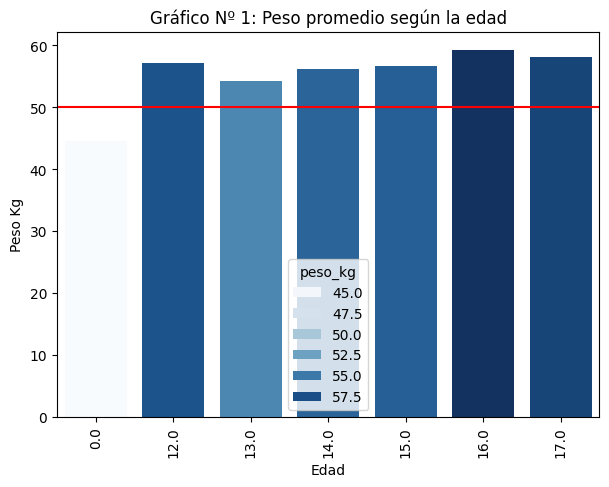

In [ ]:
# Graficamos la media según una variable
plt.figure(figsize=(7,5))

g = sns.barplot(y="peso_kg",
            x="edad",
            hue="peso_kg",
            data=medias,
            palette="Blues" # "Blues" hls
            )
g.set_xlabel("Edad")
g.set_ylabel("Peso Kg")
g.set_title("Gráfico Nº 1: Peso promedio según la edad")

plt.axhline(50, color = 'red')  # añadimos una línea
plt.xticks(rotation=90)  # rotación del texto eje X
plt.show()

# Mediana

In [ ]:
def mediana(x):
  return stats.median(x)

In [ ]:
data_nutricion_num2.apply(mediana, axis=0).round(2)

talla                          158.20
edad                            15.00
peso_kg                         55.80
circun_cuello                   32.00
IMC                             22.18
circun_cintura                  73.60
cadera                          89.00
ind_cintura_cadera               0.83
ind_cintura_estatura             0.46
por_grasa_corporal              26.09
masa_corporal_magra_kg          42.36
pliegue_cutaneo_BICEPS           8.00
pliegue_cutaneo_TRICEPS         16.00
pliegue_cutaneo_ESCAPULAR       14.00
pliegue_cutaneo_SUPRAILIACO     15.00
dtype: float64

In [ ]:
mediana_2 = pd.pivot_table(data_nutricion_num2, index=["edad"],
               aggfunc="median").reset_index().round(2)
mediana_2

,edad,IMC,cadera,circun_cintura,circun_cuello,ind_cintura_cadera,ind_cintura_estatura,masa_corporal_magra_kg,peso_kg,pliegue_cutaneo_BICEPS,pliegue_cutaneo_ESCAPULAR,pliegue_cutaneo_SUPRAILIACO,pliegue_cutaneo_TRICEPS,por_grasa_corporal,talla
0,0.0,17.97,79.00,67.00,28.70,0.85,0.43,32.39,44.60,9.0,16.00,12.00,18.00,27.38,156.90
1,12.0,25.68,94.00,77.00,34.20,0.82,0.52,39.22,57.20,16.0,20.00,19.00,19.00,31.44,147.00
2,13.0,21.04,86.50,72.70,31.00,0.82,0.46,41.52,51.70,8.0,10.75,13.75,13.25,23.07,156.85
3,14.0,21.85,88.80,72.80,31.80,0.83,0.46,42.12,55.60,8.0,14.00,14.00,16.00,26.09,157.70
4,15.0,22.16,89.00,73.60,32.00,0.83,0.46,42.10,55.60,8.0,14.00,15.00,15.00,25.54,158.20
5,16.0,22.92,91.15,75.50,32.30,0.83,0.48,43.40,57.25,9.0,15.00,16.00,17.00,27.87,158.35
6,17.0,22.24,88.75,72.25,31.75,0.82,0.46,44.37,56.80,10.0,11.00,12.00,13.50,25.40,159.85


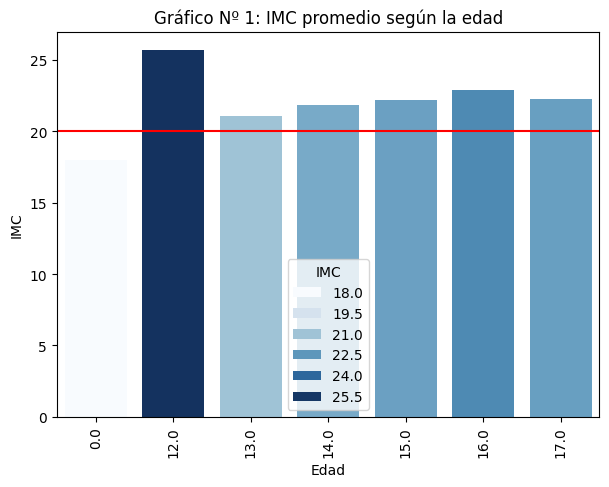

In [ ]:
# Graficamos la mediana según una variable
plt.figure(figsize=(7,5))

g = sns.barplot(y="IMC",
            x="edad",
            hue="IMC",
            data=mediana_2,
            palette="Blues" # "Blues" hls
            )
g.set_xlabel("Edad")
g.set_ylabel("IMC")
g.set_title("Gráfico Nº 1: IMC promedio según la edad")

plt.axhline(20, color = 'red')  # añadimos una línea
plt.xticks(rotation=90)  # rotación del texto eje X
plt.show()

# Moda

In [ ]:
from collections import Counter

def moda(x):
  c = Counter(x)
  return c.most_common(1)

In [ ]:
# Dato y número de veces que se repite
data_nutricion_num2.apply(moda, axis=0)

,talla,edad,peso_kg,circun_cuello,IMC,circun_cintura,cadera,ind_cintura_cadera,ind_cintura_estatura,por_grasa_corporal,masa_corporal_magra_kg,pliegue_cutaneo_BICEPS,pliegue_cutaneo_TRICEPS,pliegue_cutaneo_ESCAPULAR,pliegue_cutaneo_SUPRAILIACO
0,"(158.2, 32)","(14.0, 245)","(55.8, 27)","(32.0, 49)","(22.175, 12)","(71.0, 28)","(90.0, 28)","(0.83, 60)","(0.46, 82)","(28.79, 18)","(42.355000000000004, 4)","(5.0, 82)","(18.0, 53)","(10.0, 61)","(18.0, 49)"


# MEDIDAS DE DISPERSION

Obtenemos algunas medidas de disperción

# Rango

In [ ]:
def rango(x):
  min = np.min(x)
  max = np.max(x)
  r = max - min
  return min, max, r

In [ ]:
rang = data_nutricion_num2.apply(rango, axis=0).T
rang.columns = ["Mínimo","Máximo","Rango"]
rang

,Mínimo,Máximo,Rango
talla,135.60,188.60,53.00
edad,0.00,17.00,17.00
peso_kg,33.90,91.10,57.20
circun_cuello,24.50,39.20,14.70
IMC,14.54,36.71,22.17
circun_cintura,55.00,107.50,52.50
cadera,69.80,120.80,51.00
ind_cintura_cadera,0.65,1.03,0.38
ind_cintura_estatura,0.36,0.70,0.34
por_grasa_corporal,4.21,39.45,35.24


# Cuartiles

In [ ]:
def cuartiles(x: pd.Series):
    #Obtenemos los "Quartiles"
    Q1 = x.quantile([.25]).values[0]
    Q2 = x.quantile([.50]).values[0]
    Q3 = x.quantile([.75]).values[0]
    min = np.min(x)
    max = np.max(x)
    return min, Q1, Q2, Q3, max

In [ ]:
#Obtenemos los Quartiles
cuart = data_nutricion_num2.apply(cuartiles, axis=0).T
cuart.columns = ["Mínimo","P25% - Q1","P50% - Q2", "P75% - Q3", "Máximo"]
cuart

,Mínimo,P25% - Q1,P50% - Q2,P75% - Q3,Máximo
talla,135.60,153.8000,158.200,163.3000,188.60
edad,0.00,14.0000,15.000,15.0000,17.00
peso_kg,33.90,51.2000,55.800,61.4500,91.10
circun_cuello,24.50,30.7000,32.000,33.5000,39.20
IMC,14.54,20.3100,22.175,23.8550,36.71
circun_cintura,55.00,70.0000,73.600,78.0000,107.50
cadera,69.80,85.0000,89.000,94.0000,120.80
ind_cintura_cadera,0.65,0.8000,0.830,0.8700,1.03
ind_cintura_estatura,0.36,0.4400,0.460,0.4900,0.70
por_grasa_corporal,4.21,16.1300,26.090,30.0700,39.45


# Variancia

In [ ]:
data_nutricion_num2.apply(np.var, axis=0).round(2)

talla                          53.45
edad                            1.10
peso_kg                        71.17
circun_cuello                   4.44
IMC                             9.10
circun_cintura                 46.68
cadera                         51.52
ind_cintura_cadera              0.00
ind_cintura_estatura            0.00
por_grasa_corporal             61.52
masa_corporal_magra_kg         47.65
pliegue_cutaneo_BICEPS         32.01
pliegue_cutaneo_TRICEPS        32.36
pliegue_cutaneo_ESCAPULAR      28.13
pliegue_cutaneo_SUPRAILIACO    35.39
dtype: float64

# Desviación Estándar

In [ ]:
def coeficiente_variacion(x):
  m = stats.mean(x)
  sd = np.std(x)
  return sd/m*100

In [ ]:
data_nutricion_num2.apply(coeficiente_variacion, axis=0).round(2), "Porciento %"

(talla                           4.60
 edad                            7.10
 peso_kg                        14.83
 circun_cuello                   6.56
 IMC                            13.45
 circun_cintura                  9.17
 cadera                          7.99
 ind_cintura_cadera              6.52
 ind_cintura_estatura            9.79
 por_grasa_corporal             33.31
 masa_corporal_magra_kg         15.91
 pliegue_cutaneo_BICEPS         61.62
 pliegue_cutaneo_TRICEPS        36.35
 pliegue_cutaneo_ESCAPULAR      36.87
 pliegue_cutaneo_SUPRAILIACO    40.53
 dtype: float64,
 'Porciento %')

In [ ]:
# gráfico de puntos y curvas
plt.figure(figsize=(6,4))

sns.pairplot(data_nutricion_num2, diag_kind='kde');

Output hidden; open in https://colab.research.google.com to view.

# Correlación: r de pearson

In [ ]:
correlacion = data_nutricion_num2.corr(method='pearson').round(3)  # paramétrico

correlacion

,talla,edad,peso_kg,circun_cuello,IMC,circun_cintura,cadera,ind_cintura_cadera,ind_cintura_estatura,por_grasa_corporal,masa_corporal_magra_kg,pliegue_cutaneo_BICEPS,pliegue_cutaneo_TRICEPS,pliegue_cutaneo_ESCAPULAR,pliegue_cutaneo_SUPRAILIACO
talla,1.000,0.087,0.460,0.186,-0.150,0.161,0.022,0.199,-0.304,-0.507,0.748,-0.307,-0.357,-0.258,-0.306
edad,0.087,1.000,0.144,0.098,0.147,0.156,0.174,0.013,0.112,0.052,0.110,-0.028,0.027,0.067,0.067
peso_kg,0.460,0.144,1.000,0.752,0.746,0.774,0.689,0.276,0.545,0.202,0.772,0.206,0.348,0.482,0.411
circun_cuello,0.186,0.098,0.752,1.000,0.756,0.690,0.493,0.392,0.594,0.111,0.623,0.132,0.292,0.466,0.369
IMC,-0.150,0.147,0.746,0.756,1.000,0.766,0.780,0.163,0.827,0.590,0.309,0.451,0.664,0.742,0.680
circun_cintura,0.161,0.156,0.774,0.690,0.766,1.000,0.697,0.530,0.857,0.345,0.488,0.283,0.439,0.594,0.522
cadera,0.022,0.174,0.689,0.493,0.780,0.697,1.000,-0.200,0.666,0.618,0.239,0.405,0.677,0.654,0.657
ind_cintura_cadera,0.199,0.013,0.276,0.392,0.163,0.530,-0.200,1.000,0.417,-0.253,0.407,-0.091,-0.187,0.071,-0.046
ind_cintura_estatura,-0.304,0.112,0.545,0.594,0.827,0.857,0.666,0.417,1.000,0.569,0.130,0.416,0.595,0.698,0.650
por_grasa_corporal,-0.507,0.052,0.202,0.111,0.590,0.345,0.618,-0.253,0.569,1.000,-0.435,0.704,0.876,0.754,0.838


# Gráfico de correlación

Text(0.5, 1.0, 'Gráfico Nº XX: Gráfico de la correlación de las variables numéricas')

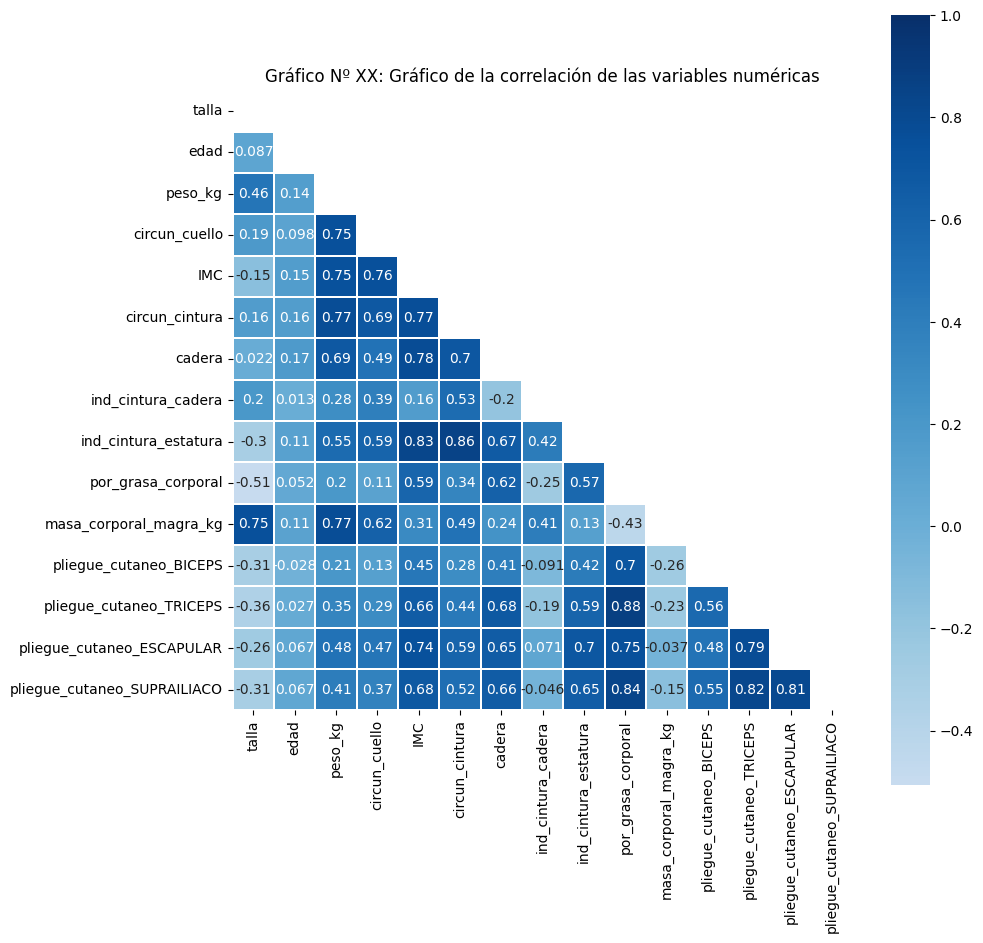

In [ ]:
mask = np.triu(np.ones_like(correlacion, dtype=bool )) #la máscara para el triángulo superior del gráfico
f, ax = plt.subplots(figsize = (10,10)) # la base para el gráfico
g = sns.heatmap(correlacion, mask = mask, cmap='Blues', vmax=1, center = 0,
            square = True, linewidths=.1, annot=True)

g.set_title("Gráfico Nº XX: Gráfico de la correlación de las variables numéricas")

No se agregaron nuevas variables de valor, ya que las variables númericas estan muy bien definidas y solo existe una variable cualitativa que separa a la población en grupos.